<a href="https://colab.research.google.com/github/Arseniy16/Computational_Math/blob/main/sem_6/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3


### Задание 1 (XI.9.2 б) из сборника Аристова, Завьялова, Лобанов, 2 часть)
---

### *Метод Стрельбы*
#### Построить алгоритм метода пристрелки для вычисления следующей нелинейной задачи:
$$
\begin{cases}
    y'' - x \sqrt{y} = 0, \qquad 0 \le x \le 1, \\
    y(0) = 0, \quad \int_0^1 y(x)dx = 1.
\end{cases}
$$

---

#### *Теоретические сведения*

Пусть необходимо решить краевую задачу вида:

$$
\begin{cases}
y'' = f(x, y, y') \\
y(0) = y_0 \\
y(L) = y_1
\end{cases}
$$

Рассмотрим вспомогательную задачу для решения данной краевой задачи: 

$$
\begin{cases}
y'' = f(x, y, y') \\
y(0) = y_0 \\
y'(0) = \alpha
\end{cases}
$$

где $\alpha$ -- некоторое число( _пристрелочный параметр_).

Для численного решения 
полученной задачи Коши, понизим порядок системы:

$$
\begin{cases}
u' = f(x, y, u) \\
y' = u \\
y(0) = y_0 \\
u(0) = \alpha
\end{cases}
$$

Решая данную численную задачу одим, из известных методов (например, методами Рунге-Куты), получим
численное решение $y(x, \alpha)$. 

Возвращаясь к изначальной задаче и рассматривая условие на правой 
границе (в точке $L$), получим уравнение

$$
F(\alpha) = y(x, \alpha) - y_1 = 0
$$

Все, что нам остается - подобрать такой параметр $\alpha$, чтобы данное выражение превратилось в 
тождество, иначе, решить данное, в общем случае, нелинейное уравнение.

In [96]:
import math
from pickle import TRUE
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# вычисление правой части ОДУ
def func(x, Y):
    y, v = Y 
    # print('y =', y, 'v = ', v, '\n')
    return np.array([v, x * np.sqrt(y)])


In [98]:
# Метод Рунге-Кутты 4-порядка
def rk4(f, tau, t, u):
    k1 = f(t, u)
    k2 = f(t + tau/2, u + tau/2*k1)
    k3 = f(t + tau/2, u + tau/2*k2)
    k4 = f(t + tau  , u + tau*k3)
    return u + tau * (k1 + 2*k2 + 2*k3 + k4)/6
    
rk4.order = 4; rk4.name = 'Классический метод РК 4 порядка'

In [99]:
def fixed_stepsize(f, y0, tmax, method, tau=0.001, verbose=False):
    t = 0; u = y0
    T = [0]; Y = [y0]
    integral_sum = 0
    # u_old = 0
    name = method.name
    flag = 0
    
    while t < tmax:
        
        # Если последний шаг выхдит за tmax - уменьшаем tau
        if t + tau > tmax: 
            tau = tmax - t
            flag = 1

        u_old = u
        u = method(f, tau, t, u)
        
        if (flag != 1):
            integral_sum += (u[0] + u_old[0]) / 2 * tau
        
        t += tau
        T.append(t)
        Y.append(u)
        # print('T = ', t, '\n')

    if verbose:
        print('%s, всего шагов: %d'%(name, len(T)-1))
    return integral_sum, np.array(T), np.array(Y)

In [100]:
# coefficients
eps = 1e-4
sum = 0

x0 = 0
y0 = 0
v0 = 1.5
b = 1 
# ---------------

# calculate the correct paramter
while(True):
    start = np.array([y0, v0]) 
    sum = 0

    sum, X, Y = fixed_stepsize(func, start, b, rk4)
    # print('temp_sum = ', sum, '\n') # just to debug

    v0 += 10 * eps
    if (abs(sum - 1.0) < eps):
        print('Total Sum = ', sum, '\n')
        # print('X= ', X, ', Y = ', Y, '\n') just to debug
        break
    
print("\u03B1 = ", v0)

Total Sum =  0.9999886279752582 

α =  1.9339999999999522


Таким образом получаем, что наш параметр **α ≈ 1,93**, при котором выполняется одно из краевых условий: $\quad \int_0^1 y(x)dx = 1$

In [101]:
# function to plot graph
def plot(x, y):
    
    fig = plt.figure(figsize = (6, 6))
    plt.title('График решения краевой задачи')

    y, c = y.T
    plt.plot(x, y)
    
    plt.text(0.0, 1.7, f'Sum = {sum}\n' + f'param = {v0}', size = 12)
    
    plt.ylabel('y')
    plt.xlabel('x')
    plt.grid()
    plt.show()


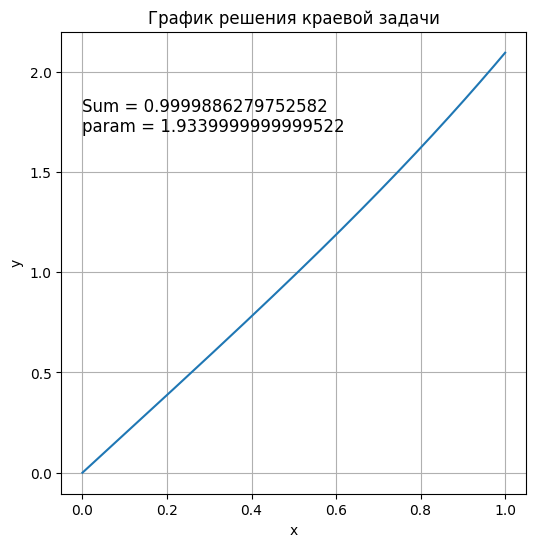

In [102]:
# for graphics
plot(X, Y)